In [54]:
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import random
import string
import numpy as np

# Timing Attack

Here we try to understand how a timing attack could work.

## String Compare

We create a very naive (and slow) method for comparing strings. It doesn't return a result (we don't really care about the result), it just terminates when the strings become different or, if they are equal, when the end is reached.

In [89]:
def simple_string_compare(a, b):
    
    i = 0
    
    while i < len(a) and i < len(b):
        
        if a[i] != b[i]:
            return
        
        i += 1

## Unknown Password

We create a random 24 character password we wish to guess.

In [128]:
unknown_password = ''.join(random.choices(string.ascii_uppercase + string.ascii_lowercase + string.digits, k=24))
print(f"Unknown password: {unknown_password}")

Unknown password: IKVz0CaMqqjxRDJ34oZ8D8QO


## Attempted Password

We create a random 24 character password as a guess (assuming for now that we know the password is 24 characters).

In [129]:
guess_password = ''.join(random.choices(string.ascii_uppercase + string.ascii_lowercase + string.digits, k=24))

# Ensure the first character is different
while guess_password[0] == unknown_password[0]:
    guess_password = ''.join(random.choices(string.ascii_uppercase + string.ascii_lowercase + string.digits, k=24))

print(f"Guess password: {guess_password}")

Guess password: JuuKZIMHcI3NimvMPPak9kZx


And another password where the first character is actually correct.

In [130]:
close_password = ''.join([unknown_password[0]] + \
                         random.choices(string.ascii_uppercase + string.ascii_lowercase + string.digits, k=23))
print(f"Close password: {close_password}")

Close password: I0E5vC2eMJttTHqdn1OhX67x


## Simple Timing

First we run the string comparison for the wrong password.

In [131]:
guess_times = []

for i in range(100):
    
    start = timer()
    simple_string_compare(unknown_password, guess_password)
    end = timer()
    
    guess_times += [end - start]

Now for the close password.

In [132]:
close_times = []

for i in range(100):
    
    start = timer()
    simple_string_compare(unknown_password, close_password)
    end = timer()
    
    close_times += [end - start]

And plot the results.

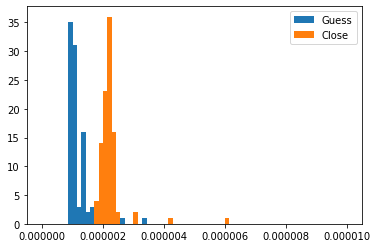

In [133]:
plt.hist(guess_times, range=(0, 1e-5), bins=70, label='Guess')
plt.hist(close_times, range=(0, 1e-5), bins=70, label='Close')

_ = plt.legend()

We can compare the means of the two distributions.

In [134]:
print(f"Guess mean: {np.mean(guess_times)}")
print(f"Close mean: {np.mean(close_times)}")

Guess mean: 1.6829976812005043e-06
Close mean: 2.433998743072152e-06


At first glance, it seems like we could just use the difference of means to guess the next character. However, we can assume that this naive comparison method is probably not in use.

## Built-In Timing

Instead of using the very simple timing method, let's use Python's built-in equality operator. First we run the string comparison for the wrong password.

In [151]:
guess_times = []

for i in range(100):
    
    start = timer()
    unknown_password == guess_password
    end = timer()
    
    guess_times += [end - start]

Now for the close password.

In [152]:
close_times = []

for i in range(100):
    
    start = timer()
    unknown_password == close_password
    end = timer()
    
    close_times += [end - start]

And plot the results.

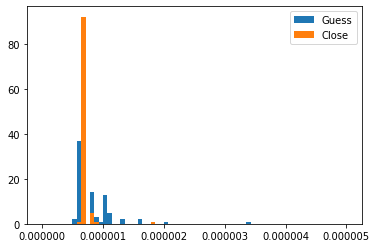

In [153]:
plt.hist(guess_times, range=(0, 5e-6), bins=70, label='Guess')
plt.hist(close_times, range=(0, 5e-6), bins=70, label='Close')

_ = plt.legend()

We can again compare the means of the two distributions.

In [154]:
print(f"Guess mean: {np.mean(guess_times)}")
print(f"Close mean: {np.mean(close_times)}")

Guess mean: 8.1100151874125e-07
Close mean: 7.169996388256549e-07


Now it seems like the difference is much more difficult to notice. In fact, the closer guess takes less time to compute, on average, sometimes! We need a better model to determine the difference between the two passwords.